In [1]:
# Import everything you could ever need. ;)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [3]:
y = df['price'].values
X =df.drop('price', axis=1)
print ('Shapes of X and y, respectively:')
print (X.shape, y.shape)
print ('\n')

Shapes of X and y, respectively:
(8495, 8) (8495,)




## 1.2 Split the data into test and train datasets using train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
print ('Shapes of X_train and X_test, respectively:')
print (X_train.shape, X_test.shape)
print ('\n')
print ('Shapes of y_train and y_test, respectively:')
print (y_train.shape, y_test.shape)

Shapes of X_train and X_test, respectively:
(5946, 8) (2549, 8)


Shapes of y_train and y_test, respectively:
(5946,) (2549,)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [6]:
print("\n Intercept: ", model.intercept_)
print("Coefficient: \n", model.coef_)

# This looks good as there should be 8 coefficients for the multiple regression equation 
# because there are 8 factors in the X matrix being used to predict the y array of price


 Intercept:  -2263470.834079912
Coefficient: 
 [  -33.58366865 -1651.42873719   -39.22295229   258.51438812
 -1032.35062237  4552.14384808  1137.43759076  8492.7810931 ]


## 1.5 Use the test data to make predictions

In [7]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 413691259.3055986
RMSE is 20339.40164571216
R^2 is 0.30955115131587385


In [8]:
# Mean squared error is pretty high which would indicate that the model deviates quite a bit from the truth
# and may indicate the presence of outliers that may be skewing the data

# Root mean squared error is also pretty high which indicates a variance of residuals from the correct value 
# in the same units (dollars) as the y array

# R^2 is just a general relative fit of the fitted regression line to the response data. Our measure of 0.309
# indicates only 31% or so of the variability of the response data is explained by the included factors

In [9]:
# As far as real predictions, in an effective predictive model, one should be able to multiply the values for each
# value in the X factors to their residuals from the fitted regression line and then sum these values to get a 
# prediction for the y, or in this case, the price of the car. 

# So for instance, the coefficient for mileage is -39.22, so for each additional mile driven, the value of the car
# should decrease by 39.22 dollars. 

In [10]:
df_with_values_and_predictions = X_test
df_with_values_and_predictions['predictions'] = y_test

/anaconda2/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
df_with_values_and_predictions.head()

,make,body,mileage,engV,engType,registration,year,drive,predictions
8221,77,2,52,2.0,3,1,2012,0,25500.0
4552,49,3,178,2.0,3,1,2005,0,9300.0
1535,80,1,1,1.5,3,1,2015,0,6500.0
4228,39,3,150,2.0,1,1,2008,0,8100.0
5623,50,2,269,2.2,0,1,2006,2,10999.0


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [12]:
# I already did this at the top of 1.5, but here are the answers again:

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

MSE is 413691259.3055986
RMSE is 20339.40164571216
R^2 is 0.30955115131587385


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

 So for instance, the coefficient for "year" is 1137.43759076, so as year number goes up by 1 (indicating the car being one year newer), the predicted value of the car should go up by 1137.43759076 according to the regression line


## 1.8 How should we interpret the Root-Mean-Square Error?

The root mean squared error is pretty high which indicates a variance of residuals from the correct value 
in the same units (dollars) as the y array

It is the square root of the average of the squared distances from the predictions and observations

So the average of all of the squared distances of the actual y values from the predicted y values is 413691259
and if you square root that to get an idea of this average deviation in dollars, it is 20,339


*The only reason the MSE is squared in the first place is to account for overestimating AND underestimating the 
true value, so it is basically just to take care of negatives. 

## 1.9 How should we interpret the $R^2$?

R^2 is just a general relative fit of the fitted regression line to the response data. Our measure of 0.309
indicates only 31% or so of the variability of the response data is explained by the included factors in our 
regression line. It is definitely a more intuitive measure as it only ranges from 0 (no variability explained) 
to 1 (perfect predictor of all variability).

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [13]:
df['ln_price'] = np.log(df['price'])

In [14]:
df.head()

# The log normal price should help reduce the skew of the data caused by outliers

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

In [19]:
y_2 = df['ln_price'].values
X_2_cols = df.columns.drop('price', 'ln_price')
#X_2_cols = X_2_cols.drop('ln_price')
X_2 = df.drop('price', axis=1)
X_2 = X_2.drop('ln_price', axis=1)
print ('Shapes of X_2 and y_2, respectively:')
print (X_2.shape, y_2.shape)
print ('\n')

Shapes of X_2 and y_2, respectively:
(8495, 8) (8495,)




In [20]:
sns.set(style="ticks", color_codes=True)
fifth_df = df.sample(frac=0.05, replace=True)


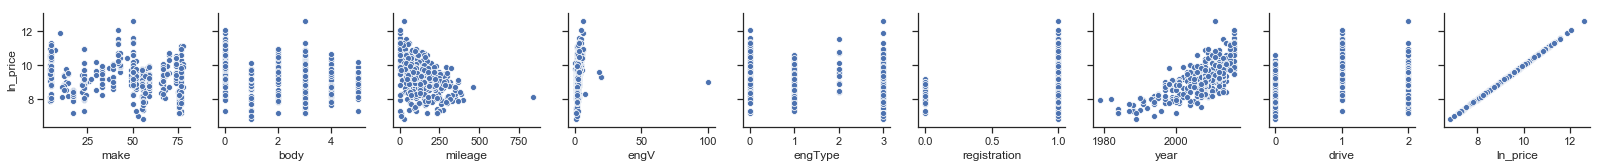

In [22]:
sns.pairplot(data=fifth_df, y_vars=['ln_price'], x_vars=X_2_cols)
plt.show();

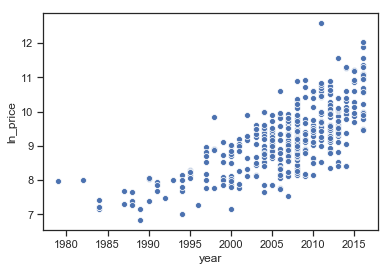

In [35]:
sns.scatterplot(x=fifth_df['year'], y=fifth_df['ln_price'])

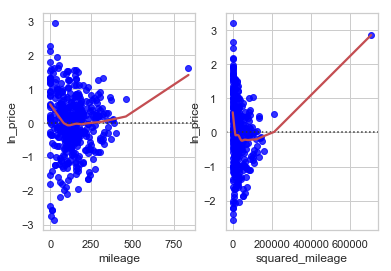

In [49]:
test_df = fifth_df
test_df['squared_mileage'] = test_df['mileage']**2
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2)
y_test = test_df['ln_price']
sns.residplot(test_df['mileage'], y_test, lowess=True, color="r", ax=axs[0], scatter_kws={'color':'blue'})
sns.residplot(test_df['squared_mileage'], y_test, lowess=True, color="r", ax=axs[1], scatter_kws={'color':'blue'})

# Not really what I would call improvement

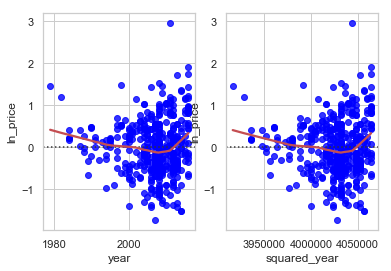

In [50]:
test_df['squared_year'] = test_df['year']**2
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2)
sns.residplot(test_df['year'], y_test, lowess=True, color="r", ax=axs[0], scatter_kws={'color':'blue'})
sns.residplot(test_df['squared_year'], y_test, lowess=True, color="r", ax=axs[1], scatter_kws={'color':'blue'})

# Yep. Still not incredibly improved.

## 2.3 If appropriate, create any polynomial features. 

Based on the scatter plots I have run and the pairplots, I just can't justify the creation of any polynomial
features based on the presence of non-linear data. Most of this data seems fairly linear or even categorical in nature. There are no incredibly visible relationships that seem to be curved or have much of an inflection point.

Mileage and year are pretty linear, but the other features are really more categorical in nature even though they 
are represented in the dataset as numbers.

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [38]:


X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=.3, random_state=42)
print ('Shapes of X2_train and X2_test, respectively:')
print (X2_train.shape, X2_test.shape)
print ('\n')
print ('Shapes of y2_train and y2_test, respectively:')
print (y2_train.shape, y2_test.shape)

model = LinearRegression()
model.fit(X2_train, y2_train)

print("\n Intercept: ", model.intercept_)
print("Coefficient: \n", model.coef_)
print ('\n')
y2_test_predict = model.predict(X2_test)

MSE = mean_squared_error(y2_test, y2_test_predict)

RMSE = (np.sqrt(mean_squared_error(y2_test, y2_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y2_test, y2_test_predict)

print('R^2 is {}'.format(R2))


df2_with_values_and_predictions = X2_test
df2_with_values_and_predictions['predictions'] = y2_test

Shapes of X2_train and X2_test, respectively:
(5946, 8) (2549, 8)


Shapes of y2_train and y2_test, respectively:
(5946,) (2549,)

 Intercept:  -182.53335958514432
Coefficient: 
 [-1.28287458e-03 -8.93561128e-02 -8.07709371e-06  8.52168139e-03
 -5.87473606e-02  7.41638634e-01  9.52550751e-02  3.95277750e-01]


MSE is 0.330313808251887
RMSE is 0.5747293347758464
R^2 is 0.6487462162659794


/anaconda2/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
df2_with_values_and_predictions

,make,body,mileage,engV,engType,registration,year,drive,predictions
8221,77,2,52,2.00,3,1,2012,0,10.146434
4552,49,3,178,2.00,3,1,2005,0,9.137770
1535,80,1,1,1.50,3,1,2015,0,8.779557
4228,39,3,150,2.00,1,1,2008,0,8.999619
5623,50,2,269,2.20,0,1,2006,2,9.305560
4584,77,3,350,2.00,1,1,2000,0,8.496990
3792,1,1,60,1.40,3,1,2012,0,9.680281
7320,44,3,34,1.60,3,1,2009,0,8.202482
5254,33,1,86,1.40,1,1,2007,0,8.824678
3661,12,1,133,1.50,3,1,2005,0,8.455318


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

 Because we log-normalized y, we are no longer looking at exact dollars, but a % change in % amount. 
 For this reason, we would now read the coefficient of "year" to mean that for every additional year model, 
 the price should increase by 9.52550751e-02 percent 

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

It seeks to minimize the cost function  as far as possible by iteratively checking the *cost function* for different coefficients 

## 3.2 What is the "Learning Rate" and what is its function?

The learning rate can be thought of as the step size the algorithm takes on its way to finding the global minimum. As the slope of the function decreases on its way to the global minimum (imagine the slope of the ground flattening as you walk towards the bottom of a valley) this new slope is multiplied to the learning rate so as the slope gets flatter, signaling decreasing distance from the minimum, the "steps" taken get smaller so not to overshoot the minimum. 

"Steps" that are too large could overshoot the minimum while "steps" too small may never reach the minimum. 

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [40]:
X_2 = sm.add_constant(X_2)

model = sm.OLS(y_2, X_2).fit()
predictions = model.predict(X_2) 

print_model = model.summary()
print(print_model)


# <<<<I *know* I did not use robust standard errors on this one. I am doing it in the next one.>>>>

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2040.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:20:26   Log-Likelihood:                -7167.0
No. Observations:                8495   AIC:                         1.435e+04
Df Residuals:                    8486   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.8341      2.144    -84.810   

# Looking back at our pairplots, it was visually obvious that the mileage variable had some serious issues with heteroskedasticity, so I will run this again with robust standard errors to correct this heteroskedasticity

In [41]:
X_2 = sm.add_constant(X_2)

model = sm.OLS(y_2, X_2).fit(cov_type='HC3')
predictions = model.predict(X_2) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1654.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:27:27   Log-Likelihood:                -7167.0
No. Observations:                8495   AIC:                         1.435e+04
Df Residuals:                    8486   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.8341      3.453    -52.653   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [42]:
# The statsmodels clearly state we have some issues with multicollinearity, so we will address that know with VIF

print(X_2.columns, '\n\n')

vif = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
print(vif)


Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive'],
      dtype='object') 


[123262.01363199769, 1.0591492515492278, 1.1583256001339457, 1.5496097971160903, 1.0093210319338708, 1.1411828507373452, 1.0918920928785216, 1.458527718550631, 1.1310208897031022]


In [45]:
# The rule of thumb is that a VIF > 10 is pretty indicative of highly correlated x variables that should typically
# be dropped

no_const_col = X_2.drop('const', axis=1)

In [47]:
print(no_const_col.columns, '\n\n')

no_const_col.corr()

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive'],
      dtype='object') 




,make,body,mileage,engV,engType,registration,year,drive
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859
registration,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709
drive,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000


In [ ]:
# That did quite a bit to help clean up the multicollinearity of the data
# some of the variables that are pretty categorical in nature like registration and drive might still look 
# a bit correlated just due to their nature of being integers with only a few unique values